|              | **Sensing Metrics**     | |  **Communication Metrics** |
|---------------------------|----|-|-|
| **Detection**            | - **Detection probability**: $P_D = \mathrm{Pr}( \mathcal{H}_1 \| \mathcal{H}_1)$ <br> <hr> - **False alarm probability**: $P_{FA} = \mathrm{Pr}( \mathcal{H}_1 \| \mathcal{H}_0)$  | **Efficiency** | - **S**pectral **E**fficiency (**SE**) <br> <hr> - **E**nergy **E**fficiency (**EE**) |
| **Estimation**           | - **Mean Squared Error (MSE)**: $\epsilon_{\theta} = \left( \mathbb{E}\left(\theta - \hat{\theta})^2\right) \right)$ <br> <hr> - **Cramer-Rao Bound (CRB)**: $\text{var}(\hat{\theta}) \geq \frac{1}{- \mathbb{E}\left(\frac{\partial^2 \ln p(\mathbb{y}_R;\theta)}{\partial \theta^2}\right)}$ $\triangleq \text{CRB}({\hat{\theta}})$ |  **Robustness** | - **B**it **E**rror **R**ate (**BER**) <br> <hr> - **S**ymbol **E**rror **R**ate (**SER**) <hr> - **F**rame **E**rror **R**ate (**FER**) 
| **Recognition**          | - **Recognition Accuracy**                           |



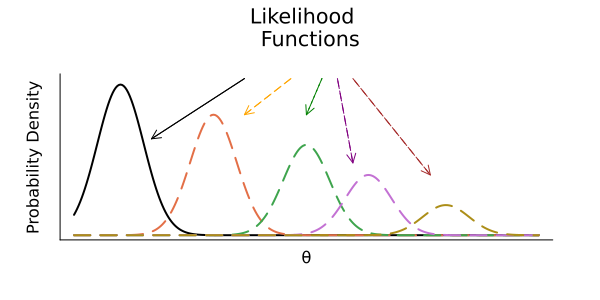

In [1]:
using Plots, Measures

# Define the range for the parameter θ
θ = -15:0.1:15

# Define multiple likelihood functions (Gaussian PDFs centered at different points)
centers = [-12, -6, 0, 4, 9]  # Centers of the distributions
σ = 1.5  # Standard deviation for all distributions
pdfs = [exp.(-0.5 .* ((θ .- c) ./ σ).^2) ./ (σ * √(2π)) for c in centers]

# Define different heights for each PDF
heights = [0.25, 0.2, 0.15, 0.1, 0.05]  # Heights for each PDF
scaled_pdfs = [pdf .* h ./ maximum(pdf) for (pdf, h) in zip(pdfs, heights)]

# Plot the first PDF as "Probability Density"
plot(θ, scaled_pdfs[1]
    , label= :false
    , linewidth=2, color=:black
    , xlabel = "θ", ylabel = "Probability Density"
    , xticks = :false, yticks = :false
    , title = "Likelihood \n Functions"
    , size = (600, 300)
    , margins=10mm  # Add margins using `margins` keyword
)

# Plot the remaining PDFs as "Likelihood Functions"
for (i, pdf) in enumerate(scaled_pdfs[2:end])
    plot!(θ, pdf, label=:false, linewidth=2, linestyle=:dash)
end

plot!()

# Draw an arrow (as a line)
plot!([-4, -10], [0.26, 0.16], color=:black, arrow=true, label=:false)
plot!([-1, -4], [0.26, 0.2], color=:orange, arrow=true, linestyle=:dash, label=:false)
plot!([1, 0], [0.26, 0.2], color=:green, arrow=true, linestyle=:dash, label=:false)
plot!([2, 3], [0.26, 0.12], color=:purple, arrow=true, linestyle=:dash, label=:false)
plot!([3, 8], [0.26, 0.10], color=:brown, arrow=true, linestyle=:dash, label=:false)

$Y_c = H_c X + Z_c, \quad Y_s = H_s(\eta) X + Z_s$

## Model

#### **Signal Model**

$Y_c = H_c X + Z_c, \quad Y_s = H_s(\eta) X + Z_s$

#### **Parameters**
- $H_c, H_s$: communication and sensing channels
- $\eta$: sensing parameters, e.g., angle, range, velocity, $\eta \sim p_\eta(\eta)$
- $X$: ISAC signal, $X \sim p_X(X)$
- $R_X = T^{-1} XX^H $: sample covariance matrix
- $ \tilde{R}_X = \mathbb{E}(R_X) $: statistical covariance matrix

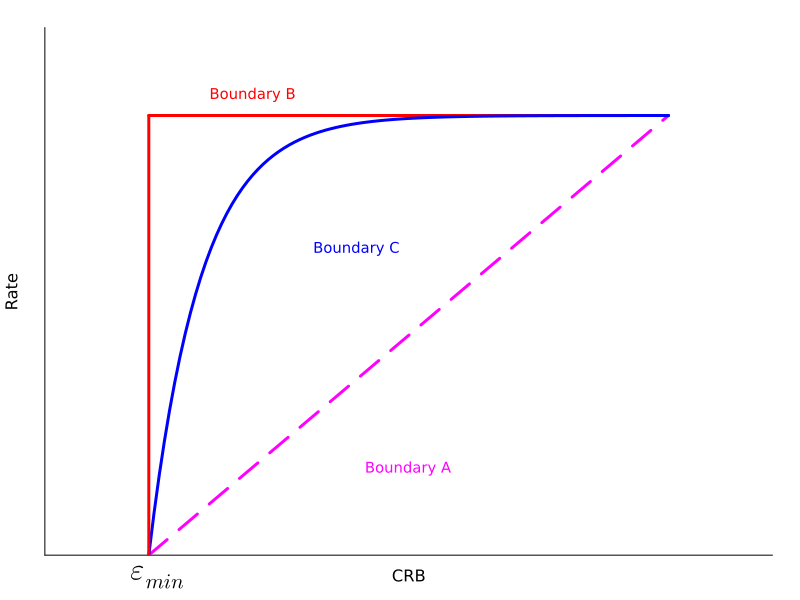

In [8]:
using Plots, LaTeXStrings, Measures

# Define the CRB range
crb = 0:0.01:1  # CRB values (x-axis)

# Define boundaries
boundary_a = crb  # Linear relationship (Boundary A)
boundary_b = ones(length(crb)) * 1.0  # Horizontal line (Boundary B, Rmax)
boundary_c = 1.0 .- exp.(-10 * crb)  # Exponential curve (Boundary C)

# Plot boundaries
plot(
    crb, boundary_a
    ,label=:false, color=:magenta, linestyle=:dash, lw=3
    ,xlabel="CRB", ylabel="Rate"
    ,xlims = (-0.2,1.2), ylims = (0,1.2)
    ,xticks = :none, yticks = :none
    , size = (800,600)
    , margins = 5mm
)
plot!(crb, boundary_b, label=:false, color=:red, linestyle=:solid,lw=3)
plot!(crb, boundary_c, label=:false, color=:blue, linestyle=:solid,lw=3)

# Add custom annotations for boundaries
annotate!(0.2, 1.05, text("Boundary B", :red, 10))
annotate!(0.4, 0.7, text("Boundary C", :blue, 10))
annotate!(0.5, 0.2, text("Boundary A", :magenta, 10))
annotate!(0.02, -0.05, text(L"\epsilon_{min}", :black, 20))

# Add a vertical line at Boundary B
plot!([0, 0], [0, 1], color=:red, linestyle=:solid, label=:false, lw=3)

# Display plot
plot!()

$
 \underbrace{\mathbb{E} \Big\{ (\eta - \hat{\eta}) (\eta - \hat{\eta})^H \Big\}}_{\text{MSE}}  \succeq \underbrace{J^{-1} = \Bigg\{ \mathbb{E} \left[ \left( \frac{\partial^2 \ln p(Y , \eta)}{\partial \eta \partial \eta^H} \right)^2 \right] \Bigg\}^{-1}}_{\text{Inverse FIM}} 
$
